# Importing Necessary Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D, BatchNormalization
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_datasets as tfds
import os
import zipfile
from google.colab import files
!pip install split-folders
import splitfolders
from tensorflow.keras.optimizers import RMSprop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Preparation

### In this we are extracting necessary folders from the archive.zip that we downloaded from kaggle. In my case I have seleteced 224 resized images and arranged the images according to animal name later I have split the images into train, test and val

In [ ]:
!unzip /content/drive/MyDrive/archive/DM/archive.zip -d /content/drive/MyDrive/archive/DM/Data

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/archive/DM/Data/cheetah-resize-224/resize-224/00000239_224resized.png  
  inflating: /content/drive/MyDrive/archive/DM/Data/cheetah-resize-224/resize-224/00000240_224resized.png  
  inflating: /content/drive/MyDrive/archive/DM/Data/cheetah-resize-224/resize-224/00000242_224resized.png  
  inflating: /content/drive/MyDrive/archive/DM/Data/cheetah-resize-224/resize-224/00000244_224resized.png  
  inflating: /content/drive/MyDrive/archive/DM/Data/cheetah-resize-224/resize-224/00000245_224resized.png  
  inflating: /content/drive/MyDrive/archive/DM/Data/cheetah-resize-224/resize-224/00000246_224resized.png  
  inflating: /content/drive/MyDrive/archive/DM/Data/cheetah-resize-224/resize-224/00000247_224resized.png  
  inflating: /content/drive/MyDrive/archive/DM/Data/cheetah-resize-224/resize-224/00000248_224resized.png  
  inflating: /content/drive/MyDrive/archive/DM/Data/cheetah-resize-224/resize-224/000

In [ ]:
cp -r /content/drive/MyDrive/archive/DM/Data/{cheetah-resize-224,fox-resize-224,hyena-resize-224,lion-resize-224,tiger-resize-224,wolf-resize-224} /content/drive/MyDrive/archive/DM/MainData/

In [ ]:
from os.path import join
from os import listdir, rmdir
from shutil import move

root = '/content/drive/MyDrive/archive/DM/MainData/cheetah-resize-224'
for filename in listdir(join(root, 'resize-224')):
    move(join(root, 'resize-224', filename), join(root, filename))
rmdir(join(root, 'resize-224'))

In [ ]:
from os.path import join
from os import listdir, rmdir
from shutil import move

root = '/content/drive/MyDrive/archive/DM/MainData/fox-resize-224'
for filename in listdir(join(root, 'fox-resize-224')):
    move(join(root, 'fox-resize-224', filename), join(root, filename))
rmdir(join(root, 'fox-resize-224'))

In [ ]:
from os.path import join
from os import listdir, rmdir
from shutil import move

root = '/content/drive/MyDrive/archive/DM/MainData/hyena-resize-224'
for filename in listdir(join(root, 'resize-224')):
    move(join(root, 'resize-224', filename), join(root, filename))
rmdir(join(root, 'resize-224'))

In [ ]:
from os.path import join
from os import listdir, rmdir
from shutil import move

root = '/content/drive/MyDrive/archive/DM/MainData/lion-resize-224'
for filename in listdir(join(root, 'lion-resize-224')):
    move(join(root, 'lion-resize-224', filename), join(root, filename))
rmdir(join(root, 'lion-resize-224'))

In [ ]:
from os.path import join
from os import listdir, rmdir
from shutil import move

root = '/content/drive/MyDrive/archive/DM/MainData/tiger-resize-224'
for filename in listdir(join(root, 'tiger-resize-224')):
    move(join(root, 'tiger-resize-224', filename), join(root, filename))
rmdir(join(root, 'tiger-resize-224'))

In [ ]:
from os.path import join
from os import listdir, rmdir
from shutil import move

root = '/content/drive/MyDrive/archive/DM/MainData/wolf-resize-224'
for filename in listdir(join(root, 'wolf-resize-224')):
    move(join(root, 'wolf-resize-224', filename), join(root, filename))
rmdir(join(root, 'wolf-resize-224'))

In [ ]:
def my_removesuffix(s, suffix):
    return s[:-len(suffix)] if s.endswith(suffix) else s

import os
dir = '/content/drive/MyDrive/archive/DM/MainData'
os.chdir(dir)
folders=os.listdir(dir)
for i in range(len(folders)):
  os.rename(folders[i], my_removesuffix(folders[i],'-resize-224'))

In [ ]:
splitfolders.ratio('/content/drive/MyDrive/archive/DM/MainData', output="/content/drive/MyDrive/archive/DM/MainData/splitwildimages", seed=24, ratio=(0.7, 0.2,0.1)) 

Copying files: 1725 files [00:22, 76.14 files/s]


In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/archive/DM/MainData/splitwildimages/train', 
        target_size=(224, 224), #All the train images are resized to 224*224
        batch_size=64,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')

validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/archive/DM/MainData/splitwildimages/val',  
        target_size=(224, 224), #All the validation images are resized to 224*224
        batch_size=32,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/archive/DM/MainData/splitwildimages/test', 
        target_size=(224, 224),  #All the test images are resized to 224*224
        batch_size=32,
        class_mode='categorical')

Found 1204 images belonging to 6 classes.
Found 340 images belonging to 6 classes.
Found 177 images belonging to 6 classes.


In [ ]:
class_names = train_generator.class_indices
print(class_names)

{'cheetah': 0, 'fox': 1, 'hyena': 2, 'lion': 3, 'tiger': 4, 'wolf': 5}


In [ ]:
import PIL
from PIL import Image
from pathlib import Path

seg = ['trian','test','val']
classes = ['cheetah', 'fox', 'hyena', 'lion', 'tiger','wolf']
for i in range(len(seg)):
  for j in range(len(classes)):
    path = Path("/content/drive/MyDrive/archive/DM/MainData/splitwildimages/".format(seg[i], classes[j])).rglob("*.png")
    for img_p in path:
      try:
        Image.open(img_p).convert('RGBA').save(img_p)
      except PIL.UnidentifiedImageError:
        print(img_p)
        os.remove(img_p)

/content/drive/MyDrive/archive/DM/MainData/splitwildimages/val/fox/00000210_224resized.png
/content/drive/MyDrive/archive/DM/MainData/splitwildimages/val/hyena/00000129_224resized.png


# Visualizing the dataset

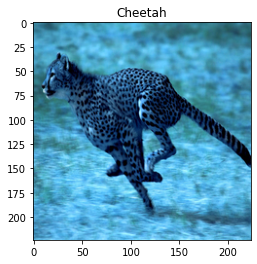

In [ ]:
img = cv2.imread("/content/drive/MyDrive/archive/DM/MainData/splitwildimages/test/cheetah/00000007_224resized.png")
plt.title("Cheetah")
plt.imshow(img)

In [ ]:
img_width = 64
img_height = 64

# Loading the data

<p>We have used ImageDataGenerator from keras, in the subsequent cells, to fetch the images along with their labels to train the neural network</p>

In [ ]:
dg = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.1)

In [ ]:
train_dg = dg.flow_from_directory(directory="/content/drive/MyDrive/archive/DM/MainData/splitwildimages/train", target_size = (img_width, img_height), color_mode="grayscale", class_mode="categorical", batch_size = 10, subset = "training", shuffle="True")

Found 1087 images belonging to 6 classes.


In [ ]:
val_dg = dg.flow_from_directory(directory="/content/drive/MyDrive/archive/DM/MainData/splitwildimages/train", target_size = (img_width, img_height),color_mode="grayscale", class_mode="categorical", batch_size = 10,subset = "validation")

Found 117 images belonging to 6 classes.


# The labels
<p>We will use one hot encoding here as our data is categorical in nature</p>

In [ ]:
train_dg.next()[1]

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

<h2> The Model </h2>

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(img_width, img_height,1), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPool2D(3,3))

model.add(Conv2D(32,(3,3), padding ="same", activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(32,activation="relu"))

model.add(Dense(64, activation="relu"))

model.add(Dense(32,activation="relu"))

model.add(Dense(6, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 32)        

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
my_callback = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 7, restore_best_weights = True)]

In [ ]:
history=model.fit(train_dg, steps_per_epoch=len(train_dg), epochs=50, validation_data=val_dg, validation_steps = len(val_dg), callbacks=my_callback)

Epoch 1/50
109/109 [==============================] - 14s 124ms/step - loss: 1.7806 - accuracy: 0.1923 - val_loss: 1.7400 - val_accuracy: 0.1966
Epoch 2/50
109/109 [==============================] - 13s 119ms/step - loss: 1.6695 - accuracy: 0.2429 - val_loss: 1.5111 - val_accuracy: 0.3590
Epoch 3/50
109/109 [==============================] - 14s 124ms/step - loss: 1.5136 - accuracy: 0.3404 - val_loss: 1.6441 - val_accuracy: 0.2821
Epoch 4/50
109/109 [==============================] - 14s 127ms/step - loss: 1.4490 - accuracy: 0.3827 - val_loss: 1.2451 - val_accuracy: 0.3932
Epoch 5/50
109/109 [==============================] - 16s 142ms/step - loss: 1.3426 - accuracy: 0.4315 - val_loss: 1.2884 - val_accuracy: 0.4957
Epoch 6/50
109/109 [==============================] - 14s 124ms/step - loss: 1.2713 - accuracy: 0.4655 - val_loss: 1.1736 - val_accuracy: 0.4872
Epoch 7/50
109/109 [==============================] - 13s 119ms/step - loss: 1.2004 - accuracy: 0.5198 - val_loss: 1.1374 - val_ac

# Preparing Test Data for prediction

In [ ]:
dg_test = ImageDataGenerator(rescale = 1/255.0)
test_dg = dg.flow_from_directory(directory="/content/drive/MyDrive/archive/DM/MainData/splitwildimages/test", target_size = (img_width, img_height), color_mode="grayscale", class_mode="categorical", batch_size = 10, subset = "training")

Found 162 images belonging to 6 classes.


In [ ]:
test_dg.next()[1]

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

# Model accuracy and loss trends

Lets visualize the accuracy and loss trends throughout the training process

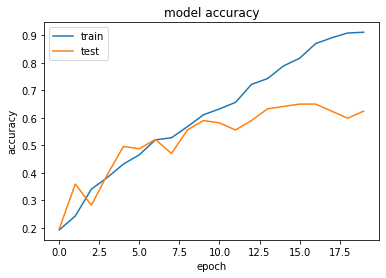

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

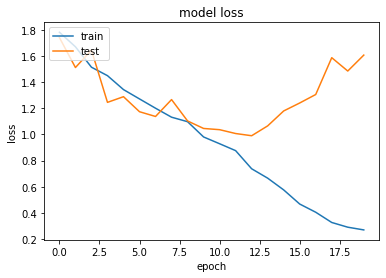

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Visualizing the predictions of the model on unseen data

In [ ]:
x,y = test_dg.next()
pred_array=[]
max_index_arr = []
for i in range(10):
    img = x[i]
    img = img.reshape(-1,64,64,1)
    pred_val = model.predict(img)
    max_idx = np.argmax(pred_val)
    pred_array.append(max_idx)

1/1 [==============================] - 0s 25ms/step


In [ ]:
cell_dict = {0: 'cheetah', 1: 'fox', 2: 'hyena', 3: 'lion', 4: 'tiger', 5: 'wolf'}
predictions = {}
actual_val = {}

k=0
for arr in y[:10]:
    actual_val[k] = cell_dict[np.argmax(arr)]
    k+=1

k=0
for pred in pred_array:
    predictions[k] = cell_dict[pred]
    k+=1
    
print("ACTUAL:", actual_val)
print("PREDICTIONS:", predictions)

ACTUAL: {0: 'hyena', 1: 'lion', 2: 'cheetah', 3: 'lion', 4: 'hyena', 5: 'lion', 6: 'tiger', 7: 'cheetah', 8: 'tiger', 9: 'wolf'}
PREDICTIONS: {0: 'lion', 1: 'wolf', 2: 'cheetah', 3: 'lion', 4: 'wolf', 5: 'wolf', 6: 'lion', 7: 'cheetah', 8: 'tiger', 9: 'cheetah'}


In [ ]:
model.save("wild_animal_classification.h5")

# Loading the data and model for prediction (Testing for TA)

### I have attached .h5 file which can be used by the TA to test the program instead of training the model again.

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D, BatchNormalization
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2

In [ ]:
model = load_model("wild_animal_classification.h5")

In [ ]:
dg = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.1)

In [ ]:
datagen_test = ImageDataGenerator(rescale = 1/255.0)
pred_dg = dg.flow_from_directory(directory="/content/drive/MyDrive/archive/DM/MainData/splitwildimages/test", target_size = (64, 64), color_mode="grayscale", class_mode="categorical", batch_size = 10, subset = "training")

Found 162 images belonging to 6 classes.


In [ ]:
x,y = pred_dg.next()
pred_array=[]
max_index_arr = []
for i in range(10):
    img = x[i]
    img = img.reshape(-1,64,64,1)
    pred_val = model.predict(img)
    max_idx = np.argmax(pred_val)
    pred_array.append(max_idx)

1/1 [==============================] - 0s 22ms/step


In [ ]:
cell_dict = {0: 'cheetah', 1: 'fox', 2: 'hyena', 3: 'lion', 4: 'tiger', 5: 'wolf'}
predictions = {}
actual_val = {}

k=0
for arr in y[:10]:
    actual_val[k] = cell_dict[np.argmax(arr)]
    k+=1

k=0
for pred in pred_array:
    predictions[k] = cell_dict[pred]
    k+=1
    
print("ACTUAL:", actual_val)
print("PREDICTIONS:", predictions)

ACTUAL: {0: 'lion', 1: 'fox', 2: 'lion', 3: 'cheetah', 4: 'fox', 5: 'hyena', 6: 'wolf', 7: 'tiger', 8: 'tiger', 9: 'wolf'}
PREDICTIONS: {0: 'wolf', 1: 'fox', 2: 'lion', 3: 'cheetah', 4: 'fox', 5: 'hyena', 6: 'fox', 7: 'cheetah', 8: 'tiger', 9: 'lion'}
